This notebook demonstrates the data preparation and modelling steps taken in the development of machine learning models to predict temperature for ...

The reason for building machine learning models is to serve them in production and make inferences from them. However, for most data scientists, especially those at the intermediate level, e.g yours truly, model development stops after tuning and selection of the best parameters. This project is a demonstration of how a Machine Learning Model can be served as an API endpoint which can be integrated into larger systems like recommender systems and other microservices.

First we do the basic imports and configurations. Other import are done ont he fly for ease of following along on what each code chunk does.

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

We read in the data and get a snapshot of its structure.

In [12]:
temp_data=pd.read_csv('data/train.csv')
temp_data.head()

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


Generate descriptive statistics of the features in the data ...

In [13]:
temp_data.describe().T

,count,mean,std,min,25%,50%,75%,max
number_of_elements,21263.0,4.115224,1.439295,1.000000,3.000000,4.000000,5.000000,9.0000
mean_atomic_mass,21263.0,87.557631,29.676497,6.941000,72.458076,84.922750,100.404410,208.9804
wtd_mean_atomic_mass,21263.0,72.988310,33.490406,6.423452,52.143839,60.696571,86.103540,208.9804
gmean_atomic_mass,21263.0,71.290627,31.030272,5.320573,58.041225,66.361592,78.116681,208.9804
wtd_gmean_atomic_mass,21263.0,58.539916,36.651067,1.960849,35.248990,39.918385,73.113234,208.9804
...,...,...,...,...,...,...,...,...
range_Valence,21263.0,2.041010,1.242345,0.000000,1.000000,2.000000,3.000000,6.0000
wtd_range_Valence,21263.0,1.483007,0.978176,0.000000,0.921454,1.063077,1.918400,6.9922
std_Valence,21263.0,0.839342,0.484676,0.000000,0.451754,0.800000,1.200000,3.0000
wtd_std_Valence,21263.0,0.673987,0.455580,0.000000,0.306892,0.500000,1.020436,3.0000


... and the dimensionsof the data.

In [14]:
temp_data.shape

(21263, 82)

We then extract the predictor variables and the target variables and save the as different objects.

In [15]:
X=temp_data.drop('critical_temp',axis=1)
y=np.sqrt(temp_data['critical_temp'])

The number of features is relatively high which points at the possibility of highly correlated variables. This means that these variables provide almost the same information to the model and so it is prudent to remove them in order to make better inference on feature importance and also to manage computational costs.

In [16]:
corr_matrix=X.corr().abs()
upper=corr_matrix.where(np.triu(np.ones(corr_matrix.shape),k=1).astype(bool))
to_drop=[col for col in X.columns if any(upper[col]>.95)]
to_drop

['wtd_gmean_atomic_mass',
 'std_atomic_mass',
 'gmean_fie',
 'wtd_gmean_fie',
 'entropy_fie',
 'std_fie',
 'wtd_gmean_atomic_radius',
 'entropy_atomic_radius',
 'wtd_entropy_atomic_radius',
 'std_atomic_radius',
 'wtd_std_atomic_radius',
 'wtd_gmean_Density',
 'std_Density',
 'std_ElectronAffinity',
 'wtd_gmean_FusionHeat',
 'std_FusionHeat',
 'std_ThermalConductivity',
 'wtd_std_ThermalConductivity',
 'gmean_Valence',
 'wtd_gmean_Valence',
 'entropy_Valence',
 'wtd_entropy_Valence',
 'std_Valence']

After extracting these columns, we remove them from the predictor set that is used for prediction. There is loss of information from doing this but efficiency gains in model development are a fair tradeoff especially when running on a CPU.

In [17]:
X.drop(to_drop,axis=1,inplace=True)
X

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,wtd_std_atomic_mass,mean_fie,...,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,mean_Valence,wtd_mean_Valence,range_Valence,wtd_range_Valence,wtd_std_Valence
0,4,88.944468,57.862692,66.361592,1.181795,1.062396,122.90607,31.794921,53.622535,775.425000,...,0.621979,0.308148,0.262848,399.97342,57.127669,2.25,2.257143,1,1.085714,0.437059
1,5,92.729214,58.518416,73.132787,1.449309,1.057755,122.90607,36.161939,53.979870,766.440000,...,0.619735,0.847404,0.567706,429.97342,51.413383,2.00,2.257143,2,1.128571,0.468606
2,4,88.944468,57.885242,66.361592,1.181795,0.975980,122.90607,35.741099,53.656268,775.425000,...,0.619095,0.308148,0.250477,399.97342,57.127669,2.25,2.271429,1,1.114286,0.444697
3,4,88.944468,57.873967,66.361592,1.181795,1.022291,122.90607,33.768010,53.639405,775.425000,...,0.620535,0.308148,0.257045,399.97342,57.127669,2.25,2.264286,1,1.100000,0.440952
4,4,88.944468,57.840143,66.361592,1.181795,1.129224,122.90607,27.848743,53.588771,775.425000,...,0.624878,0.308148,0.272820,399.97342,57.127669,2.25,2.242857,1,1.057143,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,1.177145,1.254119,146.88130,15.504479,43.202659,661.775000,...,95.001493,1.029002,0.634332,134.00000,83.048889,3.25,3.555556,1,2.168889,0.496904
21259,5,92.266740,49.021367,64.812662,1.323287,1.571630,188.38390,7.353333,50.148287,747.780000,...,1.577047,0.949904,0.745515,399.97342,76.176553,2.20,2.047619,1,0.904762,0.212959
21260,2,99.663190,95.609104,99.433882,0.690847,0.530198,13.51362,53.041104,5.405448,733.550000,...,57.038314,0.683870,0.559446,17.00000,29.000000,4.50,4.800000,1,3.200000,0.400000
21261,2,99.663190,97.095602,99.433882,0.690847,0.640883,13.51362,31.115202,6.249958,733.550000,...,58.781651,0.683870,0.659671,17.00000,15.250000,4.50,4.690000,1,2.210000,0.462493


We extract a small sample of examples of the dataset. This sample will be used to test the API endpoint.

In [18]:
sample_data_index=X.sample(5).index
X.iloc[sample_data_index].to_csv('../temp_fastapi/data/sample_data.csv',
                   index_label=False)
X.drop(sample_data_index,axis=0)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,wtd_std_atomic_mass,mean_fie,...,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,mean_Valence,wtd_mean_Valence,range_Valence,wtd_range_Valence,wtd_std_Valence
0,4,88.944468,57.862692,66.361592,1.181795,1.062396,122.90607,31.794921,53.622535,775.425000,...,0.621979,0.308148,0.262848,399.97342,57.127669,2.25,2.257143,1,1.085714,0.437059
1,5,92.729214,58.518416,73.132787,1.449309,1.057755,122.90607,36.161939,53.979870,766.440000,...,0.619735,0.847404,0.567706,429.97342,51.413383,2.00,2.257143,2,1.128571,0.468606
2,4,88.944468,57.885242,66.361592,1.181795,0.975980,122.90607,35.741099,53.656268,775.425000,...,0.619095,0.308148,0.250477,399.97342,57.127669,2.25,2.271429,1,1.114286,0.444697
3,4,88.944468,57.873967,66.361592,1.181795,1.022291,122.90607,33.768010,53.639405,775.425000,...,0.620535,0.308148,0.257045,399.97342,57.127669,2.25,2.264286,1,1.100000,0.440952
4,4,88.944468,57.840143,66.361592,1.181795,1.129224,122.90607,27.848743,53.588771,775.425000,...,0.624878,0.308148,0.272820,399.97342,57.127669,2.25,2.242857,1,1.057143,0.428809
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,1.177145,1.254119,146.88130,15.504479,43.202659,661.775000,...,95.001493,1.029002,0.634332,134.00000,83.048889,3.25,3.555556,1,2.168889,0.496904
21259,5,92.266740,49.021367,64.812662,1.323287,1.571630,188.38390,7.353333,50.148287,747.780000,...,1.577047,0.949904,0.745515,399.97342,76.176553,2.20,2.047619,1,0.904762,0.212959
21260,2,99.663190,95.609104,99.433882,0.690847,0.530198,13.51362,53.041104,5.405448,733.550000,...,57.038314,0.683870,0.559446,17.00000,29.000000,4.50,4.800000,1,3.200000,0.400000
21261,2,99.663190,97.095602,99.433882,0.690847,0.640883,13.51362,31.115202,6.249958,733.550000,...,58.781651,0.683870,0.659671,17.00000,15.250000,4.50,4.690000,1,2.210000,0.462493


We also extract the columns names of the data which will be used in defining the structure of the prediction models in the API. This is important because manually typing in each column name is tedious and at most times data will have upwards of 100 columns.

In [19]:
import json 

cols_dict=X.dtypes.to_dict()

new_cols={}
for col, type in cols_dict.items():
    if type == 'int64':
        new_cols[col] = 'int'
    else:
        new_cols[col] = 'float'

with open('../temp_fastapi/data/cols.json','w') as f:
    json.dump(new_cols,f)

The target(dependent) variable appears to be multimodal.

(array([3.45794468e-02, 5.75285691e-02, 1.11941873e-01, 1.64589859e-01,
        1.71235759e-01, 1.46832846e-01, 1.29283517e-01, 1.03426814e-01,
        9.98961795e-02, 1.01142286e-01, 7.61163197e-02, 8.96158035e-02,
        9.33541220e-02, 9.14849627e-02, 5.14018803e-02, 5.07788272e-02,
        5.35825661e-02, 6.15784142e-02, 7.91277430e-02, 1.17237824e-01,
        1.39460051e-01, 1.00311548e-01, 3.11526547e-02, 2.62720722e-02,
        1.50571165e-02, 1.06957448e-02, 2.07684365e-04, 0.00000000e+00,
        0.00000000e+00, 1.03842182e-04]),
 array([ 0.01449138,  0.46739068,  0.92028999,  1.37318929,  1.82608859,
         2.2789879 ,  2.7318872 ,  3.18478651,  3.63768581,  4.09058512,
         4.54348442,  4.99638373,  5.44928303,  5.90218233,  6.35508164,
         6.80798094,  7.26088025,  7.71377955,  8.16667886,  8.61957816,
         9.07247746,  9.52537677,  9.97827607, 10.43117538, 10.88407468,
        11.33697399, 11.78987329, 12.2427726 , 12.6956719 , 13.1485712 ,
        13.60147

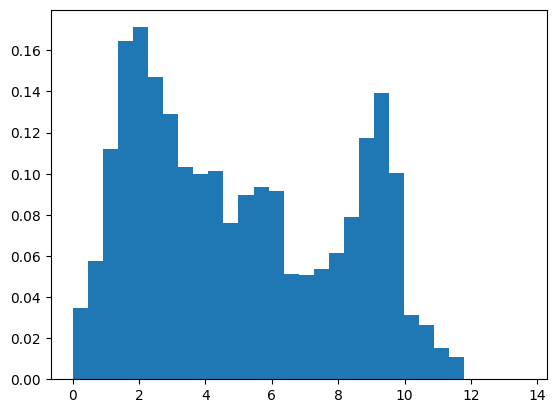

In [20]:
plt.hist(y,bins=30,density=True,)

To begin model development, we split the data int a training set and testing set which will be used for algorithm training and performance evaluation respectively.

In [21]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size=.3,random_state=36)

Normally, we build a couple of models on the training set and choose the best model for prediction based on performance. However, this is a demonstrative project and so all models will be considered for inference.

**Support Vector Regression**
The support vector machine is an algorithm that initially developed for classification tasks but has been extended to regression tasks as well. It is relatively simple and has lesser computational costs. This model however requires that the features are standardized. This improves performance as the features are on the same scale.

The model is evaluated on 5 cross-validated folds with the final performance of the model averaged across the folds. With 5 folds, the model is trained using 4 folds and evaluated on the remaining fold. This is repeated until each fold is used for evaluation. 

To further improve performance and reduce computational costs, the PCA algorithm is used to filter a smaller subset of the features combination which provide a high threshold of information gain.

In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

pipe_svr=make_pipeline(StandardScaler(),PCA(n_components=40),LinearSVR())
scores=cross_val_score(estimator=pipe_svr,X=X_train,y=y_train,cv=5)

We can then check the performance of the model on the folds.

In [23]:
scores.mean()

0.732949260274879

That is quite low but it can be used baseline model aginsta which we evaluate more complex models.

Given this level of performance, we then make a final fit of the model on the training data and evaluate on the testing data.

In [24]:
pipe_svr.fit(X_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('pca', PCA(n_components=40)), ('linearsvr', LinearSVR())])

We see that SVR models performance poorly on unseen data. This hints at the risk of overfittig.

In [25]:
pipe_svr.score(X_test,y_test)

0.7219547557785726

Save/serialize the model object for use in another context as a .joblib object

In [26]:
import joblib

joblib.dump(pipe_svr,'../temp_fastapi/saved_models/temp_svr_model.joblib')

['../temp_fastapi/saved_models/temp_svr_model.joblib']

**Random Forest Regression**

To train a more robust model, we use a more complex model. The Random Forest algorithm is an *Ensemble* type of model which involves fitting many decision trees on the data and aggregating the results of each tree in order to arrive at a final model. The rationale for this is that indivindual trees will have high variance which makes it more likely to overfit. To reduce overfitting, many trees are built and their result aggregated. The trees are also pruned by a applying a penalty to more complicated trees. This is called *pruning*

In this case, tuning these parameters was done(code not shown) and the following parameters,i.e, number of trees, maximum tree depth etc were selected from the best combination.

In [27]:
from sklearn.ensemble import RandomForestRegressor

rf=RandomForestRegressor(
    n_estimators=500,
    max_depth=10,
    criterion='squared_error',
    n_jobs=-1,
    max_features='sqrt',
    bootstrap=True,
    max_samples=.8,
    warm_start=True)

scores=cross_val_score(rf,X_train,y_train)
scores.mean()

0.8955843834292286

From the final fit, we see that the results of the Random Forest algorithm have greater improvement in performance over the Support Vector Regression.

In [28]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=10, max_features='sqrt', max_samples=0.8,
                      n_estimators=500, n_jobs=-1, warm_start=True)

Overfitting has nearly been reduced to zero in this case!

In [29]:
rf.score(X_test,y_test)

0.8920928451125301

We then save the model object.

In [30]:
joblib.dump(rf,'../temp_fastapi/saved_models/temp_rf_model.joblib')

['../temp_fastapi/saved_models/temp_rf_model.joblib']

**LightGbm Regression**

Another model that has been used to achieve higher performance of machine learning algorithms is the gradient boosting regression. This algorithims builds a series of weak learners which are sequentially trained on the errors of the previous learner. It is a powerful algorithm that is mostly used in large scale machine learning tasks. There are variants of this algorithm; the eXtreme Gradient Boosting (*XGBoost*) and the *LightGBM*. The models are quite similar but LightGBm has better performance and lesser computational costs as well.

As was the case in the Random Forest Regression, hyperparameter tuning is not shown here but the best combination of parameters is selected here.

In [31]:
import lightgbm as lgb

lgbm=lgb.LGBMRegressor(
    n_estimators=1000,
    colsample_bytree=.8,
    learning_rate=.1,
    max_depth=-1)

In [32]:

lgbm.fit(X_train,y_train)
lgbm.score(X_test,y_test)

0.9276982583149322

This models provides significant improvement over the Random Forest Regression. We can we this as the best models as the scope of this project is a demonstration of deployment.

We then save the model.

In [33]:
joblib.dump(lgbm,'../temp_fastapi/saved_models/temp_lightgbm_model.joblib')

['../temp_fastapi/saved_models/temp_lightgbm_model.joblib']

Try out saved model!

In [48]:
test_model=joblib.load('../temp_fastapi/saved_models/temp_lightgbm_model.joblib')
test_model

LGBMRegressor(colsample_bytree=0.8, n_estimators=1000)

In [53]:
example=X_test.iloc[[np.random.randint(low=1,high=X_test.shape[0]),]]
example

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,wtd_std_atomic_mass,mean_fie,...,wtd_gmean_ThermalConductivity,entropy_ThermalConductivity,wtd_entropy_ThermalConductivity,range_ThermalConductivity,wtd_range_ThermalConductivity,mean_Valence,wtd_mean_Valence,range_Valence,wtd_range_Valence,wtd_std_Valence
8340,5,89.33718,52.143003,70.560647,1.444537,1.389451,124.90825,19.010603,45.345269,740.52,...,1.102786,0.45781,0.206207,399.97342,92.542605,2.6,2.092557,2,1.012727,0.338884


In [59]:
float(test_model.predict(example))

8.412264156534869